In [1]:
import os,sys
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

# Get the data sorted

## Temperature from environment DB

In [4]:
temp = pd.read_csv("/home/prokoph/CTA/ArrayClockSystem/WRS/MonitoringWRSS/weather_Jan13.csv",index_col=0, parse_dates=True)
print(temp.shape)
temp.tail(4)

(8109, 3)


/usr/local/lib/python3.5/dist-packages/pandas/core/tools/datetimes.py:314: UserWarning: Discarding nonzero nanoseconds in conversion
  for ts in result]


,humidity,location,temperature
2020-01-13 13:58:40.235827+00:00,41.299999,shack,14.4
2020-01-13 14:03:40.922435+00:00,41.299999,shack,14.4
2020-01-13 14:08:41.617931+00:00,41.299999,shack,14.4
2020-01-13 14:13:42.265481+00:00,41.200001,shack,14.4


## PtPData (incl RTT) from telegraf DB

In [5]:
ptp = pd.read_csv("/home/prokoph/CTA/ArrayClockSystem/WRS/MonitoringWRSS/PtpData_Jan13.csv",index_col=0, parse_dates=True)
print(ptp.shape)
ptp.tail(4)

(972697, 23)


,agent_host,host,index,wrsPtpClockOffsetErrCnt,wrsPtpClockOffsetPs,wrsPtpClockOffsetPsHR,wrsPtpDeltaRxM,wrsPtpDeltaRxS,wrsPtpDeltaTxM,wrsPtpDeltaTxS,...,wrsPtpOwnID,wrsPtpPhaseTracking,wrsPtpRTT,wrsPtpRTTErrCnt,wrsPtpServoState,wrsPtpServoStateErrCnt,wrsPtpServoStateN,wrsPtpServoUpdateTime,wrsPtpServoUpdates,wrsPtpSkew
2020-01-13 14:25:00+00:00,192.168.4.31,haai,1,0,0,0,0,0,0,0,...,NaN,1,0,0,NaN,0,0,0,0,0
2020-01-13 14:25:00+00:00,192.168.4.32,haai,1,5,0,0,7200,4800,0,0,...,NaN,2,40326809,3,TRACK_PHASE,5,4,1578925515483759744,2034970,-2
2020-01-13 14:25:00+00:00,192.168.4.33,haai,1,4,9223372036854775807,-1,14400,2400,0,0,...,NaN,2,931043,3,TRACK_PHASE,4,4,1578925516090730992,3760608,-9
2020-01-13 14:25:00+00:00,192.168.4.34,haai,1,4,9223372036854775807,-2,10400,2400,0,0,...,NaN,2,927390,3,TRACK_PHASE,4,4,1578925515734130208,3004751,6


In [6]:
wrs2_ptp = ptp['agent_host'].map(lambda x: x == '192.168.4.32')
rtt2 = ptp[wrs2_ptp]
rtt2 = rtt2[np.isfinite(rtt2['wrsPtpRTT'])]

wrs3_ptp = ptp['agent_host'].map(lambda x: x == '192.168.4.33')
rtt3 = ptp[wrs3_ptp]
rtt3 = rtt3[np.isfinite(rtt3['wrsPtpRTT'])]

wrs4_ptp = ptp['agent_host'].map(lambda x: x == '192.168.4.34')
rtt4 = ptp[wrs4_ptp]
rtt4 = rtt4[np.isfinite(rtt4['wrsPtpRTT'])]


## snmp fields from telegraf DB

In [7]:
snmp = pd.read_csv("/home/prokoph/CTA/ArrayClockSystem/WRS/MonitoringWRSS/snmp_Jan13.csv",index_col=0, parse_dates=True)
print(snmp.shape)
snmp.tail(4)

(974862, 39)


,agent_host,host,wrsAuxClkSetStatus,wrsBootCnt,wrsBootConfigStatus,wrsBootSuccessful,wrsCPULoadAvg15min,wrsCPULoadAvg1min,wrsCPULoadAvg5min,wrsConfigSource,...,wrsSoftPLLStatus,wrsSpllAlignState,wrsSpllMode,wrsSpllSeqState,wrsTempFPGA,wrsTempPLL,wrsTempPSL,wrsTempPSR,wrsTemperatureWarning,wrsTimingStatus
2020-01-13 14:10:10+00:00,192.168.4.32,haai,1.0,1.0,4.0,2.0,7,1.0,5.0,5.0,...,1.0,0.0,3.0,8.0,38.0,38.0,26.0,28.0,2.0,2.0
2020-01-13 14:10:10+00:00,192.168.4.33,haai,1.0,1.0,4.0,2.0,9,27.0,12.0,5.0,...,1.0,0.0,3.0,8.0,39.0,37.0,26.0,27.0,2.0,2.0
2020-01-13 14:10:10+00:00,192.168.4.35,haai,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13 14:10:11+00:00,192.168.4.34,haai,1.0,1.0,4.0,2.0,8,3.0,8.0,3.0,...,1.0,0.0,3.0,8.0,36.0,35.0,26.0,28.0,2.0,2.0


In [256]:
wrs1_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.31')
wrs2_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.32')
wrs3_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.33')
wrs4_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.34')
wrs5_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.35')
wrs6_snmp = snmp['agent_host'].map(lambda x: x == '192.168.4.165')

# make selection for one variable only (and remove all NaN to make plots look nicer)
cpu5_snmp = snmp[wrs5_snmp]
cpu5_snmp = cpu5_snmp[np.isfinite(cpu5_snmp['wrsCPULoadAvg15min'])]
cpu6_snmp = snmp[wrs6_snmp]
cpu6_snmp = cpu6_snmp[np.isfinite(cpu6_snmp['wrsCPULoadAvg15min'])]

## Timing from oszi DB

In [9]:
oszi = pd.read_csv("/home/prokoph/CTA/ArrayClockSystem/WRS/MonitoringWRSS/timing_Jan13.csv",index_col=0, parse_dates=True)
print(oszi.shape)
oszi.tail(4)

(88183, 3)


,link,skew,skewrms
2020-01-13 14:05:01.255079+00:00,wrs1-wrs4,-32.110,10.690
2020-01-13 14:05:31.513785+00:00,wrs1-wrs2,2772.317,8.103
2020-01-13 14:05:31.573998+00:00,wrs1-wrs3,-39.683,7.680
2020-01-13 14:05:31.623222+00:00,wrs1-wrs4,-32.430,11.680


In [10]:
wrs2_oszi = oszi['link'].map(lambda x: x == 'wrs1-wrs2')
wrs2_oszi = oszi[wrs2_oszi]
wrs3_oszi = oszi['link'].map(lambda x: x == 'wrs1-wrs3')
wrs3_oszi = oszi[wrs3_oszi]
wrs4_oszi = oszi['link'].map(lambda x: x == 'wrs1-wrs4')
wrs4_oszi = oszi[wrs4_oszi]

# Get the plotting running

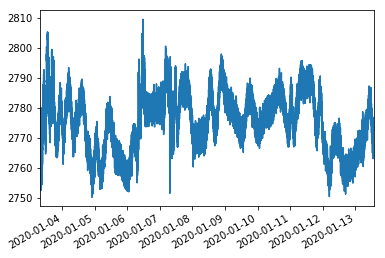

In [11]:
#temp.temperature.plot(figsize=(15,8))
#rtt3.wrsPtpRTT.rolling("1h").mean().plot()
wrs2_oszi['skew'].loc['2020-01-03':'2020-01-13'].plot()

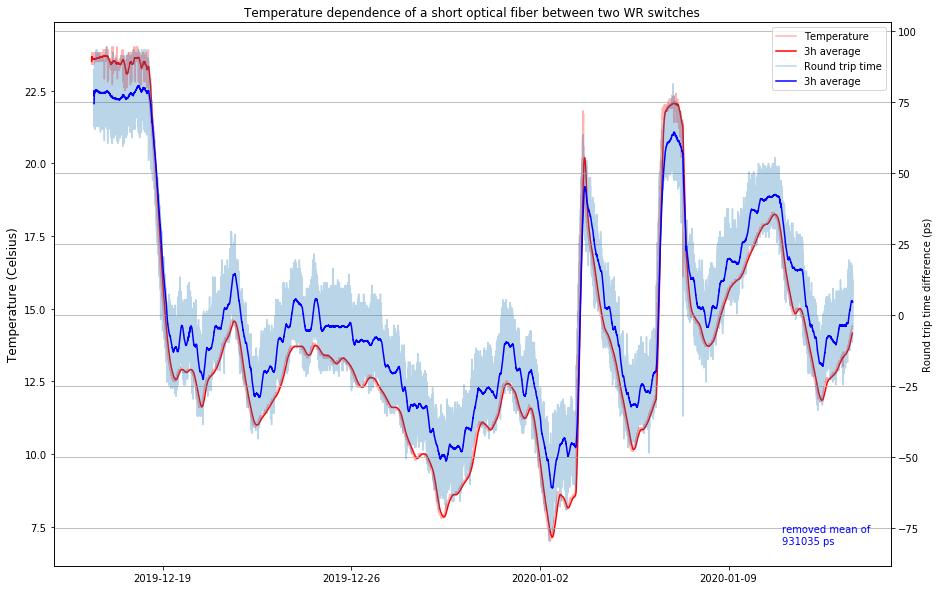

In [73]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)

ax1.plot(temp['temperature'],
         alpha=0.3,color='red',label='Temperature')
ax1.plot(temp['temperature'].rolling("3h").mean(),
         color='red',label='3h average')

ax1.set_ylabel('Temperature (Celsius)',fontsize='large')
ax1.set_title('Temperature dependence of a short optical fiber between two WR switches')

rtt3mean = rtt3['wrsPtpRTT'].mean()
ax2.plot(rtt3['wrsPtpRTT']-rtt3mean,
         alpha=0.3,label='Round trip time')
ax2.plot((rtt3['wrsPtpRTT']-rtt3mean).rolling("3h").mean(), 
         color='blue',label='3h average')
ax2.set_ylabel('Round trip time difference (ps)')

text = ('removed mean of \n%i ps' % rtt3mean )
plt.gca().text(0.87, 0.04, text, transform=plt.gca().transAxes, color='blue')


# plot all labels from different axes into one legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


(<matplotlib.legend.Legend at 0x7f4c8162ecf8>,
 <matplotlib.legend.Legend at 0x7f4c8163a240>)

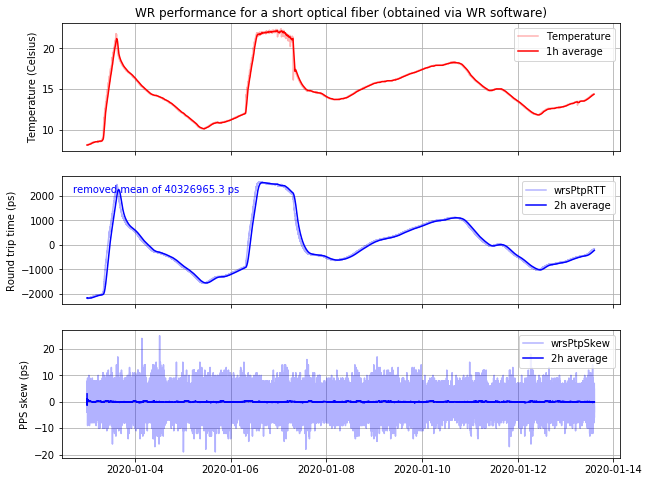

In [233]:
temploc = temp['temperature'].loc['2020-01-03':'2020-01-13']
rtt2loc = rtt2['wrsPtpRTT'].loc['2020-01-03':'2020-01-13']
rtt3loc = rtt3['wrsPtpRTT'].loc['2020-01-03':'2020-01-13']
rtt4loc = rtt4['wrsPtpRTT'].loc['2020-01-03':'2020-01-13']
skw2loc = rtt2['wrsPtpSkew'].loc['2020-01-03':'2020-01-13']
skw3loc = rtt3['wrsPtpSkew'].loc['2020-01-03':'2020-01-13']
skw4loc = rtt4['wrsPtpSkew'].loc['2020-01-03':'2020-01-13']

# Creates two subplots 
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,8))
ax1.grid(), ax2.grid(), ax3.grid()

ax1.set_title('WR performance for a short optical fiber (obtained via WR software)')

ax1.plot(temploc,alpha=0.3,color='red',label='Temperature')
ax1.plot(temploc.rolling("1h").mean(),color='red',label='1h average')
ax1.set_ylabel('Temperature (Celsius)')

mymean = rtt2loc.mean()
ax2.plot(rtt2loc-mymean,alpha=0.3, color='blue')
ax2.plot((rtt2loc-mymean).rolling("2h").mean(),color='blue',label='2h average')
ax2.set_ylabel('Round trip time (ps)')
text = ('removed mean of %.1f ps' % mymean )
ax2.text(0.02, 0.87, text, transform=ax2.transAxes, color='blue')

ax3.plot(skw2loc,alpha=0.3, color='blue')
ax3.plot(skw2loc.rolling("2h").mean(),color='blue',label='2h average')
ax3.set_ylabel('PPS skew (ps)')

ax1.legend(), ax2.legend(), ax3.legend()

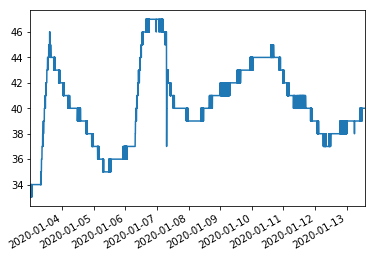

In [274]:
# make selection for one variable only (and remove all NaN to make plots look nicer)
fpga3_snmp = snmp[wrs3_snmp]
fpga3_snmp = fpga3_snmp[np.isfinite(fpga3_snmp['wrsTempFPGA'])]
tfp3loc = fpga3_snmp['wrsTempFPGA'].loc['2020-01-03':'2020-01-13']
#tfp3loc.plot()
fpga1_snmp = snmp[wrs1_snmp]
fpga1_snmp = fpga1_snmp[np.isfinite(fpga1_snmp['wrsTempFPGA'])]
tfp1loc = fpga1_snmp['wrsTempFPGA'].loc['2020-01-03':'2020-01-13']
tfp1loc.plot()

(<matplotlib.legend.Legend at 0x7f4c72a30208>,
 <matplotlib.legend.Legend at 0x7f4c72a366d8>)

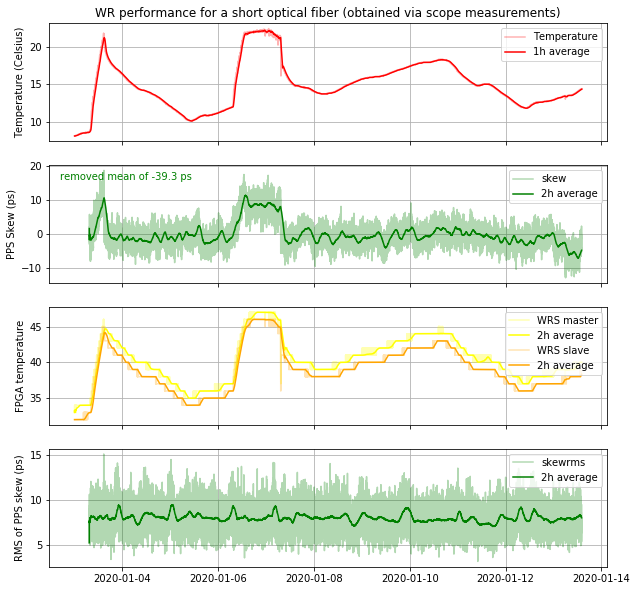

In [279]:
temploc = temp['temperature'].loc['2020-01-03':'2020-01-13']
osz2loc = wrs2_oszi['skew'].loc['2020-01-03':'2020-01-13']
osz3loc = wrs3_oszi['skew'].loc['2020-01-03':'2020-01-13']
osz4loc = wrs4_oszi['skew'].loc['2020-01-03':'2020-01-13']
rms2loc = wrs2_oszi['skewrms'].loc['2020-01-03':'2020-01-13']
rms3loc = wrs3_oszi['skewrms'].loc['2020-01-03':'2020-01-13']
rms4loc = wrs4_oszi['skewrms'].loc['2020-01-03':'2020-01-13']

# Creates two subplots 
f, (ax1, ax2, ax22, ax3) = plt.subplots(4, 1, sharex=True, figsize=(10,10))
ax1.grid(), ax2.grid(), ax3.grid()
ax22.grid()

ax1.set_title('WR performance for a short optical fiber (obtained via scope measurements)')

ax1.plot(temploc,alpha=0.3,color='red',label='Temperature')
ax1.plot(temploc.rolling("1h").mean(),color='red',label='1h average')
ax1.set_ylabel('Temperature (Celsius)')

mymean = osz3loc.mean()
ax2.plot(osz3loc-mymean,alpha=0.3, color='green')
ax2.plot((osz3loc-mymean).rolling("2h").mean(),color='green',label='2h average')
text = ('removed mean of %.1f ps' % mymean )
ax2.text(0.02, 0.87, text, transform=ax2.transAxes, color='green')
ax2.set_ylabel('PPS Skew (ps)')

ax22.plot(tfp1loc,alpha=0.3, label='WRS master', color='yellow')
ax22.plot(tfp1loc.rolling("2h").mean(),color='yellow',label='2h average')
ax22.plot(tfp3loc,alpha=0.3, color='orange', label='WRS slave')
ax22.plot(tfp3loc.rolling("2h").mean(),color='orange',label='2h average')
#text = ('removed mean of %.1f ps' % mymean )
#ax2.text(0.02, 0.87, text, transform=ax2.transAxes, color='green')
ax22.set_ylabel('FPGA temperature')
ax22.legend()

ax3.plot(rms2loc,alpha=0.3, color='green')
ax3.plot(rms2loc.rolling("2h").mean(),color='green',label='2h average')
ax3.set_ylabel('RMS of PPS skew (ps)')

ax1.legend(), ax2.legend(), ax3.legend()

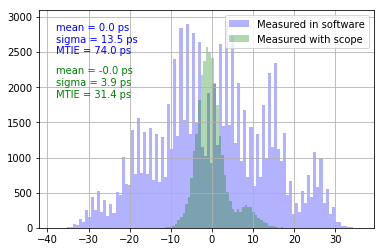

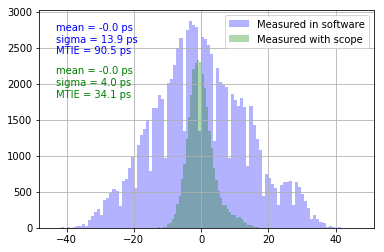

In [159]:
fig = plt.figure()

# TODO: ensure that the RTT is twice the number of what we measure... 
#       but still... its not matching expectations

mymean = rtt3loc.mean()
myval = (rtt3loc-mymean)/2
ax = myval.hist(alpha=0.3, color='blue', bins=100, label='Measured in software')
(osz3loc-osz3loc.mean()).hist(alpha=0.3, color='green', bins=50, label='Measured with scope', ax=ax)

mydiff = myval.max() - myval.min()
text = ('mean = %.1f ps\nsigma = %.1f ps\nMTIE = %0.1f ps' % (myval.mean(),myval.std(), mydiff) )
myval = osz3loc-osz3loc.mean()
mydiff = myval.max() - myval.min()
text2 = ('mean = %.1f ps\nsigma = %.1f ps\nMTIE = %0.1f ps' % (myval.mean(),myval.std(), mydiff) )

plt.gca().text(0.05, 0.8, text, color='blue', transform=plt.gca().transAxes)
plt.gca().text(0.05, 0.6, text2, transform=plt.gca().transAxes, color='green')
plt.legend()

fig = plt.figure()

mymean = rtt4loc.mean()
myval = (rtt4loc-mymean)/2
ax = myval.hist(alpha=0.3, color='blue', bins=100, label='Measured in software')
(osz4loc-osz4loc.mean()).hist(alpha=0.3, color='green', bins=50, label='Measured with scope', ax=ax)
#osz2loc.hist(alpha=0.3, color='green', bins=50, label='Measured with scope', ax=ax)

mydiff = myval.max() - myval.min()
text = ('mean = %.1f ps\nsigma = %.1f ps\nMTIE = %0.1f ps' % (myval.mean(),myval.std(), mydiff) )
myval = osz4loc-osz4loc.mean()
mydiff = myval.max() - myval.min()
text2 = ('mean = %.1f ps\nsigma = %.1f ps\nMTIE = %0.1f ps' % (myval.mean(),myval.std(), mydiff) )

plt.gca().text(0.05, 0.8, text, color='blue', transform=plt.gca().transAxes)
plt.gca().text(0.05, 0.6, text2, transform=plt.gca().transAxes, color='green')
plt.legend()

(<matplotlib.legend.Legend at 0x7f0d5cae07f0>,
 <matplotlib.legend.Legend at 0x7f0d5caf2ba8>)

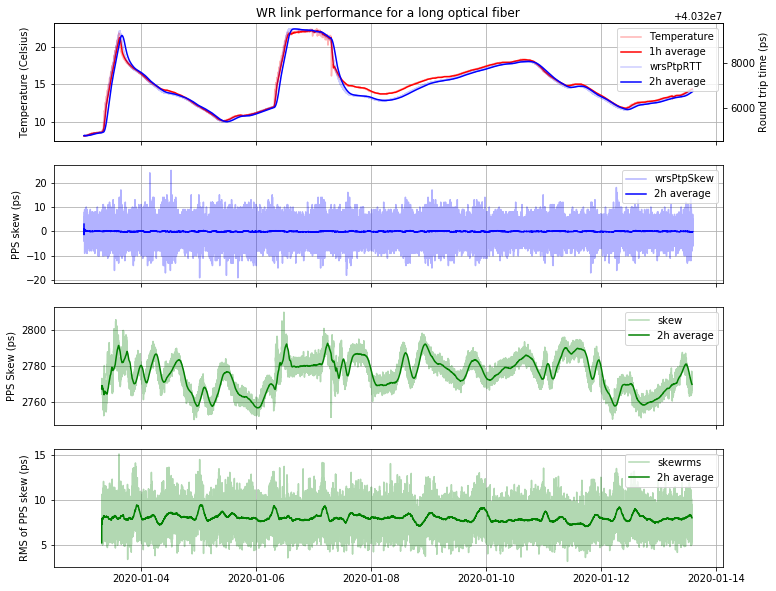

In [355]:
# Creates two subplots 
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12,10))
ax1.grid(), ax2.grid(), ax3.grid(), ax4.grid()

ax1.set_title('WR link performance for a long optical fiber')

ax1.plot(temploc,alpha=0.3,color='red',label='Temperature')
ax1.plot(temploc.rolling("1h").mean(),color='red',label='1h average')
ax1.set_ylabel('Temperature (Celsius)')

ax11 = ax1.twinx()
ax11.plot(rtt2loc,alpha=0.2, color='blue')
ax11.plot(rtt2loc.rolling("2h").mean(),color='blue',label='2h average')
ax11.set_ylabel('Round trip time (ps)')

ax2.plot(skw2loc,alpha=0.3, color='blue')
ax2.plot(skw2loc.rolling("2h").mean(),color='blue',label='2h average')
ax2.set_ylabel('PPS skew (ps)')

ax3.plot(osz2loc,alpha=0.3, color='green')
ax3.plot(osz2loc.rolling("2h").mean(),color='green',label='2h average')
ax3.set_ylabel('PPS Skew (ps)')

ax4.plot(rms2loc,alpha=0.3, color='green')
ax4.plot(rms2loc.rolling("2h").mean(),color='green',label='2h average')
ax4.set_ylabel('RMS of PPS skew (ps)')

# plot all labels from different axes into one legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax11.legend(lines + lines2, labels + labels2, loc=0)
ax2.legend(), ax3.legend(), ax4.legend()

# Group by constant temperature

/usr/local/lib/python3.5/dist-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


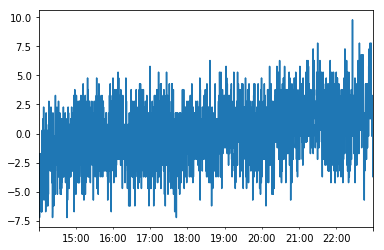

In [218]:
temploc = temp['temperature'].loc['2020-01-06 14':'2020-01-06 22']
rtt2loc = rtt2['wrsPtpRTT'].loc['2020-01-06 14':'2020-01-06 22']
rtt3loc = rtt3['wrsPtpRTT'].loc['2020-01-06 14':'2020-01-06 22']
rtt4loc = rtt4['wrsPtpRTT'].loc['2020-01-06 14':'2020-01-06 22']
skw2loc = rtt2['wrsPtpSkew'].loc['2020-01-06 14':'2020-01-06 22']
skw3loc = rtt3['wrsPtpSkew'].loc['2020-01-06 14':'2020-01-06 22']
skw4loc = rtt4['wrsPtpSkew'].loc['2020-01-06 14':'2020-01-06 22']
osz2loc = wrs2_oszi['skew'].loc['2020-01-06 14':'2020-01-06 22']
osz3loc = wrs3_oszi['skew'].loc['2020-01-06 14':'2020-01-06 22']
osz4loc = wrs4_oszi['skew'].loc['2020-01-06 14':'2020-01-06 22']
rms2loc = wrs2_oszi['skewrms'].loc['2020-01-06 14':'2020-01-06 22']
rms3loc = wrs3_oszi['skewrms'].loc['2020-01-06 14':'2020-01-06 22']
rms4loc = wrs4_oszi['skewrms'].loc['2020-01-06 14':'2020-01-06 22']

#temploc.plot()
temploc.mean(), temploc.std()

((rtt3loc-rtt3loc.mean())/2).plot()

(<matplotlib.legend.Legend at 0x7f4c80ff5898>,
 <matplotlib.legend.Legend at 0x7f4c80ff9f60>)

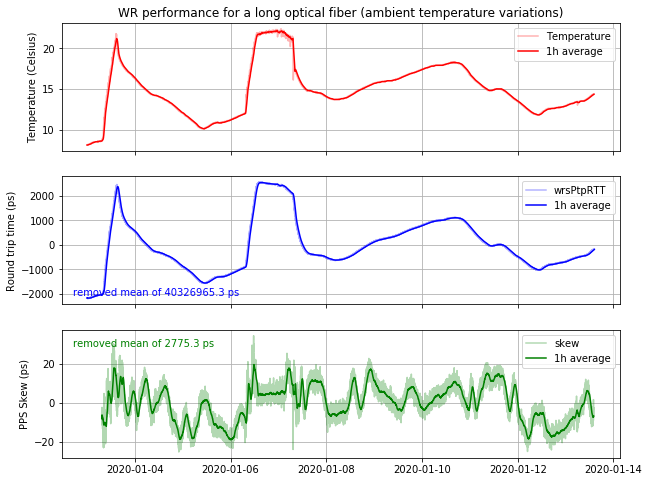

In [242]:
# Creates three subplots 
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,8))
ax1.grid(), ax2.grid(), ax3.grid()

ax1.set_title('WR performance for a long optical fiber (ambient temperature variations)')

ax1.plot(temploc,alpha=0.3,color='red',label='Temperature')
ax1.plot(temploc.rolling("1h").mean(),color='red',label='1h average')
ax1.set_ylabel('Temperature (Celsius)')

mymean = rtt2loc.mean()
ax2.plot(rtt2loc-mymean,alpha=0.3, color='blue')
ax2.plot((rtt2loc-mymean).rolling("1h").mean(),color='blue',label='1h average')
ax2.set_ylabel('Round trip time (ps)')
text = ('removed mean of %.1f ps' % mymean )
ax2.text(0.02, 0.07, text, transform=ax2.transAxes, color='blue')

mymean = osz2loc.mean()
ax3.plot(osz2loc-mymean,alpha=0.3, color='green')
ax3.plot((osz2loc-mymean).rolling("1h").mean(),color='green',label='1h average')
ax3.set_ylabel('PPS Skew (ps)')
text = ('removed mean of %.1f ps' % mymean )
ax3.text(0.02, 0.87, text, transform=ax3.transAxes, color='green')

ax1.legend(), ax2.legend(), ax3.legend()

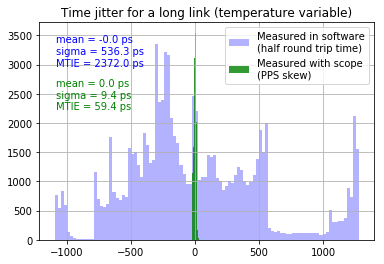

In [252]:
fig = plt.figure()

mymean = rtt2loc.mean()
myval = (rtt2loc-mymean)/2
ax = myval.hist(alpha=0.3, color='blue', bins=100, label='Measured in software\n(half round trip time)')
(osz2loc-osz2loc.mean()).hist(alpha=0.8, color='green', bins=20, label='Measured with scope\n(PPS skew)', ax=ax)
#osz2loc.hist(alpha=0.3, color='green', bins=50, label='Measured with scope', ax=ax)

mydiff = myval.max() - myval.min()
text = ('mean = %.1f ps\nsigma = %.1f ps\nMTIE = %0.1f ps' % (myval.mean(),myval.std(), mydiff) )
myval = osz2loc-osz2loc.mean()
mydiff = myval.max() - myval.min()
text2 = ('mean = %.1f ps\nsigma = %.1f ps\nMTIE = %0.1f ps' % (myval.mean(),myval.std(), mydiff) )

plt.gca().text(0.05, 0.8, text, color='blue', transform=plt.gca().transAxes)
plt.gca().text(0.05, 0.6, text2, transform=plt.gca().transAxes, color='green')
plt.title('Time jitter for a long link (temperature variable)')
plt.legend()

Text(0,0.5,'PPS skew (ps)')

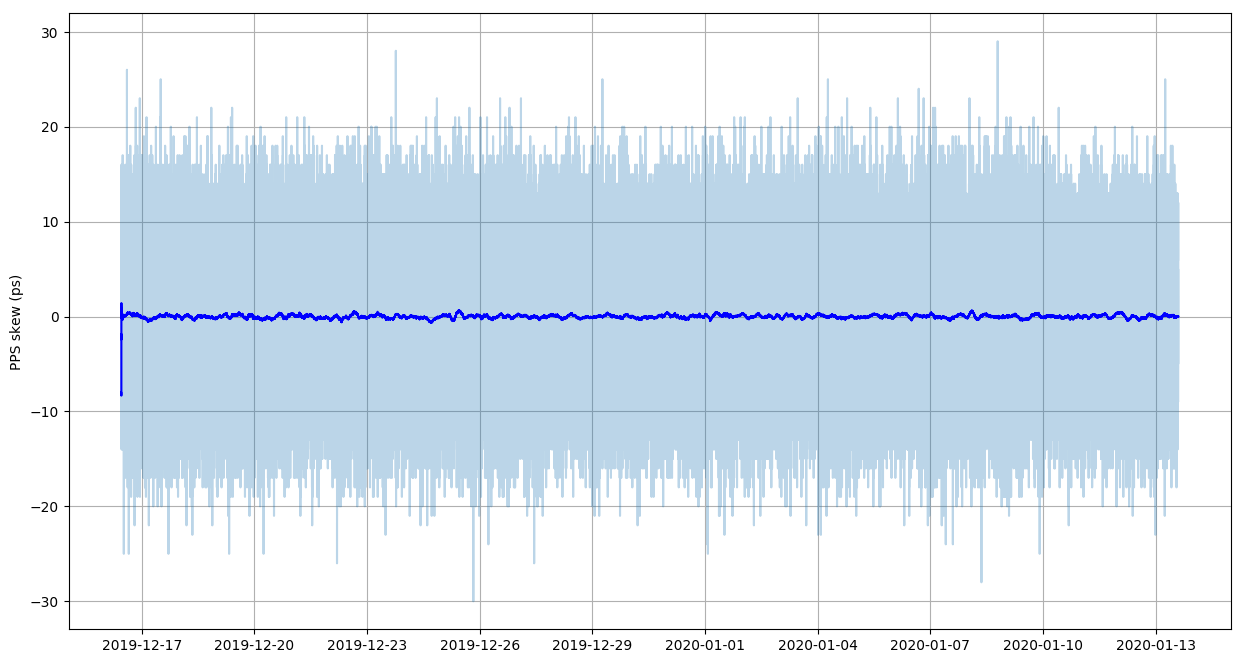

In [163]:
fig = plt.figure(figsize=(15,8))
plt.grid(True)

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(rtt4.wrsPtpSkew,alpha=0.3,label='PTP skew')
ax1.plot(rtt4.wrsPtpSkew.rolling("3h").mean(), color='blue',label='3h average')
ax1.set_ylabel('PPS skew (ps)')

#ax3.plot(rtt4.wrsPtpRTT,alpha=0.2,color='orange',label='Round Trip Time (RTT)')
#ax3.plot(rtt4.wrsPtpRTT.rolling("3h").mean(),color='green',label='3h RTT average')
#ax2.set_ylabel('Uncalibrated Round Trip Time (ps)')

# plot all labels from different axes into one legend
#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines + lines2, labels + labels2, loc=0)

11.132549019607843 10.0
4.240893611710378 4.0


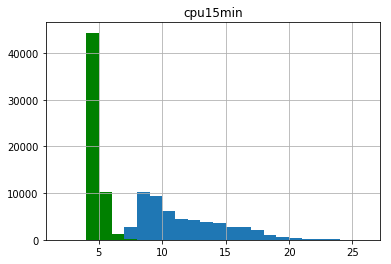

In [9]:
ax = df[wrs5].hist(column='cpu15min',bins=24)
df[wrs6].hist(column='cpu15min',color='green',bins=5,ax=ax)
print(cpu5.cpu15min.mean(),cpu5.cpu15min.median())
print(cpu6.cpu15min.mean(),cpu6.cpu15min.median())

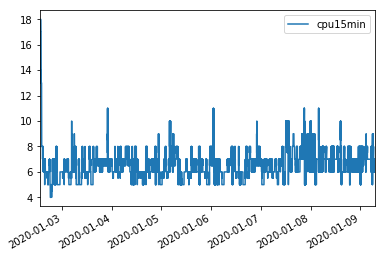

In [10]:
df[["cpu15min"]].rolling("1h").median().plot()

Plot with cuts on time range

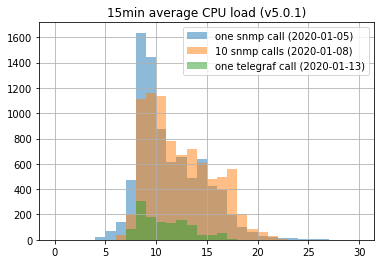

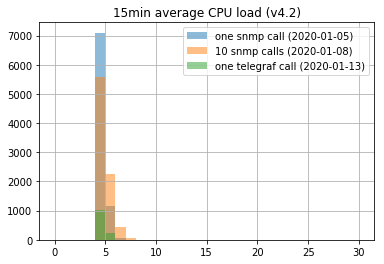

In [42]:
# remember that during 2020-01-07 we switched from 1 snmp call to ~13 snmp calls
ax = df[wrs5].loc['2020-01-05':'2020-01-05'].hist(column='cpu15min',bins=30, range=(0,30), alpha=0.5, label='one snmp call (2020-01-05)')
df[wrs5].loc['2020-01-08':'2020-01-08'].hist(column='cpu15min',bins=30, range=(0,30), ax=ax, alpha=0.5, label='10 snmp calls (2020-01-08)')
snmp[wrs5_snmp].loc['2020-01-13':'2020-01-13'].hist(column='wrsCPULoadAvg15min',bins=30, range=(0,30), ax=ax, alpha=0.5, label='one telegraf call (2020-01-13)')

plt.title('15min average CPU load (v5.0.1)')
plt.legend()

#histtype='step'
ax = df[wrs6].loc['2020-01-05':'2020-01-05'].hist(column='cpu15min',bins=30, range=(0,30), alpha=0.5, label='one snmp call (2020-01-05)')
df[wrs6].loc['2020-01-08':'2020-01-08'].hist(column='cpu15min',bins=30, range=(0,30), ax=ax, alpha=0.5, label='10 snmp calls (2020-01-08)')
snmp[wrs6_snmp].loc['2020-01-13':'2020-01-13'].hist(column='wrsCPULoadAvg15min',bins=30, range=(0,30), ax=ax, alpha=0.5, label='one telegraf call (2020-01-13)')

# get current axis to draw some text in
#plt.gca().text(0.1, 0.9, "test", transform=plt.gca().transAxes)
plt.title('15min average CPU load (v4.2)')
plt.legend()